# Assignment 3

Welcome to Assignment 3. This will be even more fun. Now we will calculate statistical measures. 

## You only have to pass 4 out of 7 functions

Just make sure you hit the play button on each cell from top to down. There are seven functions you have to implement. Please also make sure than on each change on a function you hit the play button again on the corresponding cell to make it available to the rest of this notebook.

This notebook is designed to run in a IBM Watson Studio Apache Spark runtime. In case you are running it in an IBM Watson Studio standard runtime or outside Watson Studio, we install Apache Spark in local mode for test purposes only. Please don't use it in production.

In [5]:
!pip install --upgrade pip

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
  Using cached pip-20.0.2-py2.py3-none-any.whl (1.4 MB)


In [6]:
if not ('sc' in locals() or 'sc' in globals()):
    print('It seems you are note running in a IBM Watson Studio Apache Spark Notebook. You might be running in a IBM Watson Studio Default Runtime or outside IBM Waston Studio. Therefore installing local Apache Spark environment for you. Please do not use in Production')
    
    from pip import main
    main(['install', 'pyspark==2.4.5'])
    
    from pyspark import SparkContext, SparkConf
    from pyspark.sql import SparkSession

    sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))
    
    spark = SparkSession \
        .builder \
        .getOrCreate()

All functions can be implemented using DataFrames, ApacheSparkSQL or RDDs. We are only interested in the result. You are given the reference to the data frame in the "df" parameter and in case you want to use SQL just use the "spark" parameter which is a reference to the global SparkSession object. Finally if you want to use RDDs just use "df.rdd" for obtaining a reference to the underlying RDD object. But we discurage using RDD at this point in time.

Let's start with the first function. Please calculate the minimal temperature for the test data set you have created. We've provided a little skeleton for you in case you want to use SQL. Everything can be implemented using SQL only if you like.

In [7]:
def minTemperature():
    #TODO Please enter your code here, you are not required to use the template code below
    #some reference: https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrame
    return spark.sql("SELECT min(temperature) as mintemp from washing").first().mintemp

Please now do the same for the mean of the temperature

In [8]:
def meanTemperature():
    #TODO Please enter your code here, you are not required to use the template code below
    #some reference: https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrame
    return spark.sql("SELECT AVG(temperature) as meantemp from washing").first().meantemp

Please now do the same for the maximum of the temperature

In [9]:
def maxTemperature():
    #TODO Please enter your code here, you are not required to use the template code below
    #some reference: https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrame
    return spark.sql("SELECT MAX(temperature) as maxtemp from washing").first().maxtemp

Please now do the same for the standard deviation of the temperature

In [10]:
def sdTemperature():
    #TODO Please enter your code here, you are not required to use the template code below
    #some reference: https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrame
    #https://spark.apache.org/docs/2.3.0/api/sql/
    return spark.sql("SELECT STDDEV(temperature) as sdtemp from washing").first().sdtemp

Please now do the same for the skew of the temperature. Since the SQL statement for this is a bit more complicated we've provided a skeleton for you. You have to insert custom code at four positions in order to make the function work. Alternatively you can also remove everything and implement if on your own. Note that we are making use of two previously defined functions, so please make sure they are correct. Also note that we are making use of python's string formatting capabilitis where the results of the two function calls to "meanTemperature" and "sdTemperature" are inserted at the "%s" symbols in the SQL string.

In [11]:
def skewTemperature():    
    return spark.sql("""
SELECT 
    (
         count(temperature)/(count(temperature)-1)/(count(temperature)-2)
    ) *
    SUM (
        POWER(temperature-%s,3)/POWER(%s,3)
    )

as sktemperature from washing
                    """ %(meanTemperature(),sdTemperature())).first().sktemperature

Kurtosis is the 4th statistical moment, so if you are smart you can make use of the code for skew which is the 3rd statistical moment. Actually only two things are different.

In [12]:
def kurtosisTemperature():    
        return spark.sql("""
SELECT 
        (
            1/COUNT(temperature)
        ) *
        SUM (
            POWER(temperature-%s, 4)/POWER(%s, 4)
        )
as ktemperature from washing
                    """ %(meanTemperature(),sdTemperature())).first().ktemperature


Just a hint. This can be solved easily using SQL as well, but as shown in the lecture also using RDDs.

In [13]:
def correlationTemperatureHardness():
    #TODO Please enter your code here, you are not required to use the template code below
    #some reference: https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrame
    #https://spark.apache.org/docs/2.3.0/api/sql/
    return spark.sql("SELECT corr(temperature,hardness) as temperaturehardness from washing").first().temperaturehardness

Now it is time to grab a PARQUET file and create a dataframe out of it. Using SparkSQL you can handle it like a database. 

In [14]:
!wget https://github.com/IBM/coursera/blob/master/coursera_ds/washing.parquet?raw=true
!mv washing.parquet?raw=true washing.parquet

--2020-04-13 12:29:49--  https://github.com/IBM/coursera/blob/master/coursera_ds/washing.parquet?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/IBM/skillsnetwork/blob/master/coursera_ds/washing.parquet?raw=true [following]
--2020-04-13 12:29:49--  https://github.com/IBM/skillsnetwork/blob/master/coursera_ds/washing.parquet?raw=true
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/IBM/skillsnetwork/raw/master/coursera_ds/washing.parquet [following]
--2020-04-13 12:29:49--  https://github.com/IBM/skillsnetwork/raw/master/coursera_ds/washing.parquet
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IBM/skillsnetwork/master/coursera_ds/washing.parquet [fo

In [15]:
df = spark.read.parquet('washing.parquet')
df.createOrReplaceTempView('washing')
df.show()

+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|                 _id|                _rev|count|flowrate|fluidlevel|frequency|hardness|speed|temperature|           ts|voltage|
+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|0d86485d0f88d1f9d...|1-57940679fb8a713...|    4|      11|acceptable|     null|      77| null|        100|1547808723923|   null|
|0d86485d0f88d1f9d...|1-15ff3a0b304d789...|    2|    null|      null|     null|    null| 1046|       null|1547808729917|   null|
|0d86485d0f88d1f9d...|1-97c2742b68c7b07...|    4|    null|      null|       71|    null| null|       null|1547808731918|    236|
|0d86485d0f88d1f9d...|1-eefb903dbe45746...|   19|      11|acceptable|     null|      75| null|         86|1547808738999|   null|
|0d86485d0f88d1f9d...|1-5f68b4c72813c25...|    7|    null|      null|       75|    null| null|   

Now let's test the functions you've implemented

In [16]:
min_temperature = minTemperature()
print(min_temperature)

80


In [17]:
mean_temperature = meanTemperature()
print(mean_temperature)

90.03800298062593


In [18]:
max_temperature = maxTemperature()
print(max_temperature)

100


In [19]:
sd_temperature = sdTemperature()
print(sd_temperature)

6.1007610586219725


In [20]:
skew_temperature = skewTemperature()
print(skew_temperature)

0.010421660313145537


In [21]:
kurtosis_temperature = kurtosisTemperature()
print(kurtosis_temperature)

1.773427150876985


In [22]:
correlation_temperature = correlationTemperatureHardness()
print(correlation_temperature)

0.017754069047296324


Congratulations, you are done, please submit this notebook to the grader. 
We have to install a little library in order to submit to coursera first.

Then, please provide your email address and obtain a submission token on the grader’s submission page in coursera, then execute the subsequent cells

### Note: We've changed the grader in this assignment and will do so for the others soon since it gives less errors
This means you can directly submit your solutions from this notebook

In [23]:
!rm -f rklib.py
!wget https://raw.githubusercontent.com/IBM/coursera/master/rklib.py

--2020-04-13 12:30:23--  https://raw.githubusercontent.com/IBM/coursera/master/rklib.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2540 (2.5K) [text/plain]
Saving to: 'rklib.py'

100%[======================================>] 2,540       --.-K/s   in 0s      

2020-04-13 12:30:23 (37.8 MB/s) - 'rklib.py' saved [2540/2540]



In [24]:
from rklib import submitAll
import json

key = "Suy4biHNEeimFQ479R3GjA"
email = 'myemail.12198@yahoo.com'###_YOUR_CODE_GOES_HERE_###
token ='Ps2k5eQWMXVqCQmZ'
###_YOUR_CODE_GOES_HERE_### #you can obtain it from the grader page on Coursera




In [25]:
parts_data = {}
parts_data["FWMEL"] = json.dumps(min_temperature)
parts_data["3n3TK"] = json.dumps(mean_temperature)
parts_data["KD3By"] = json.dumps(max_temperature)
parts_data["06Zie"] = json.dumps(sd_temperature)
parts_data["Qc8bI"] = json.dumps(skew_temperature)
parts_data["LoqQi"] = json.dumps(kurtosis_temperature)
parts_data["ehNGV"] = json.dumps(correlation_temperature)



submitAll(email, token, key, parts_data)

Something went wrong, please have a look at the reponse of the grader
-------------------------
{"errorCode":"invalidEmailOrToken","message":"Invalid email or token.","details":{"learnerMessage":"You used an invalid email or your token may have expired. Please make sure you have entered all fields correctly. Try generating a new token if the issue still persists."}}
-------------------------


In [26]:
df.show()

+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|                 _id|                _rev|count|flowrate|fluidlevel|frequency|hardness|speed|temperature|           ts|voltage|
+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|0d86485d0f88d1f9d...|1-57940679fb8a713...|    4|      11|acceptable|     null|      77| null|        100|1547808723923|   null|
|0d86485d0f88d1f9d...|1-15ff3a0b304d789...|    2|    null|      null|     null|    null| 1046|       null|1547808729917|   null|
|0d86485d0f88d1f9d...|1-97c2742b68c7b07...|    4|    null|      null|       71|    null| null|       null|1547808731918|    236|
|0d86485d0f88d1f9d...|1-eefb903dbe45746...|   19|      11|acceptable|     null|      75| null|         86|1547808738999|   null|
|0d86485d0f88d1f9d...|1-5f68b4c72813c25...|    7|    null|      null|       75|    null| null|   

In [31]:
result = spark.sql ("Select voltage from washing where voltage is not null ")
result_array = result.rdd.map(lambda row: row.voltage).sample(False,0.1).collect()
result_array

[244,
 226,
 221,
 221,
 231,
 248,
 222,
 235,
 237,
 234,
 238,
 229,
 227,
 239,
 223,
 224,
 225,
 223,
 225,
 223,
 225,
 231,
 230,
 221,
 224,
 232,
 227,
 223,
 224,
 220,
 237,
 232,
 222,
 222,
 239,
 232,
 227,
 220,
 238,
 230,
 236,
 228,
 235,
 237,
 221,
 220,
 221,
 227,
 232]

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

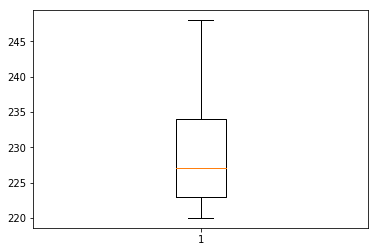

In [37]:
plt.boxplot(result_array)
plt.show()

# Run Chart

In [51]:
result = spark.sql("select voltage,ts from washing where voltage is not null order by ts asc")
result_rdd = result.rdd.sample(False,0.1).map(lambda row : (row.ts,row.voltage))

result_array_ts = result_rdd.map(lambda ts_voltage: ts_voltage[0]).collect()
result_array_voltage = result_rdd.map(lambda ts_voltage: ts_voltage[1]).collect()
print(result_array_ts[:15])
print(result_array_voltage[:15])

[1547808728916, 1547808734922, 1547808740927, 1547808767938, 1547808815972, 1547808818973, 1547808852031, 1547808909090, 1547809020199, 1547809041212, 1547809053217, 1547809089240, 1547809158278, 1547809182314, 1547809185316]
[222, 234, 235, 224, 226, 237, 223, 239, 221, 235, 226, 227, 226, 225, 221]


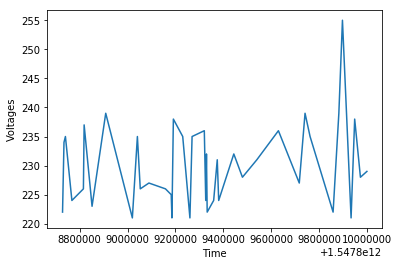

In [52]:
plt.plot(result_array_ts,result_array_voltage)
plt.xlabel("Time")
plt.ylabel("Voltages")
plt.show()

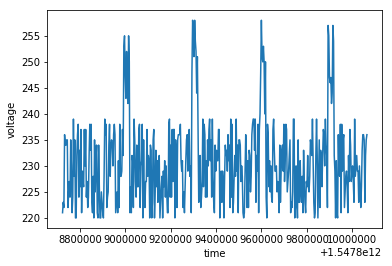

In [53]:

result = spark.sql(
"""
select voltage,ts from washing 
    where voltage is not null and 
    ts > 1547808720911 and
    ts <= 1547810064867+3600000
    order by ts asc
""")
result_rdd = result.rdd.map(lambda row : (row.ts,row.voltage))
result_array_ts = result_rdd.map(lambda ts_voltage: ts_voltage[0]).collect()
result_array_voltage = result_rdd.map(lambda ts_voltage: ts_voltage[1]).collect()
plt.plot(result_array_ts,result_array_voltage)
plt.xlabel("time")
plt.ylabel("voltage")
plt.show()

In [54]:
result_df = spark.sql("""
select hardness,temperature,flowrate from washing
    where hardness is not null and 
    temperature is not null and 
    flowrate is not null
""")
result_rdd = result_df.rdd.sample(False,0.1).map(lambda row : (row.hardness,row.temperature,row.flowrate))
result_array_hardness = result_rdd.map(lambda hardness_temperature_flowrate: hardness_temperature_flowrate[0]).collect()
result_array_temperature = result_rdd.map(lambda hardness_temperature_flowrate: hardness_temperature_flowrate[1]).collect()
result_array_flowrate = result_rdd.map(lambda hardness_temperature_flowrate: hardness_temperature_flowrate[2]).collect()


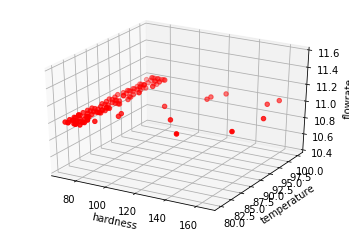

In [55]:

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(result_array_hardness,result_array_temperature,result_array_flowrate, c='r', marker='o')

ax.set_xlabel('hardness')
ax.set_ylabel('temperature')
ax.set_zlabel('flowrate')

plt.show()

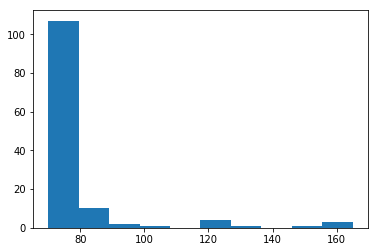

In [56]:

plt.hist(result_array_hardness)
plt.show()